<a href="https://colab.research.google.com/github/avnisinngh/Scikit-Learn/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OVERVIEW

In [ ]:
from sklearn.datasets import load_breast_cancer #func that loads a dataset
from sklearn.model_selection import train_test_split # func that allow to split the data into training and testing portion
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = load_breast_cancer(as_frame=True).frame

In [ ]:
 data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X # data is plit into X as an numpy array without names and labels

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y # y is the target, what we are trying to predict
# 0,1 is the format we need ot scikit learn in general
# this is what we get as default from the dataset module

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
print(knn.score(X_test_scaled, y_test))

0.9912280701754386


#### This is what we do use scikit learn for
1. we have a dataset
2. we want to either do classification or regression or clustering
3. we want to train on that data
4. make predictions with out trained model

### here we have breast cancer dataset
1. we load it
2. we split it into training and testing set
3. we scale the data
4. we train the model
5. we see how well the model performs on unseen data

## DATASETS

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# one way of loading the dataset as default
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# another way of loading the dataset by spliting it into as X and y , if we dont want any meta data
X = data.data
y = data.target

X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# Or you can return as X, y immediatly, pass them as parameter, it wsill return a tuple
X,y = load_breast_cancer(return_X_y=True)

X, y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# Or you can import as a pandas dataframe
df = load_breast_cancer(as_frame=True).frame

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### loading => loading it from the package itself
### fetching => loading it from the internet
### make => randomly make data

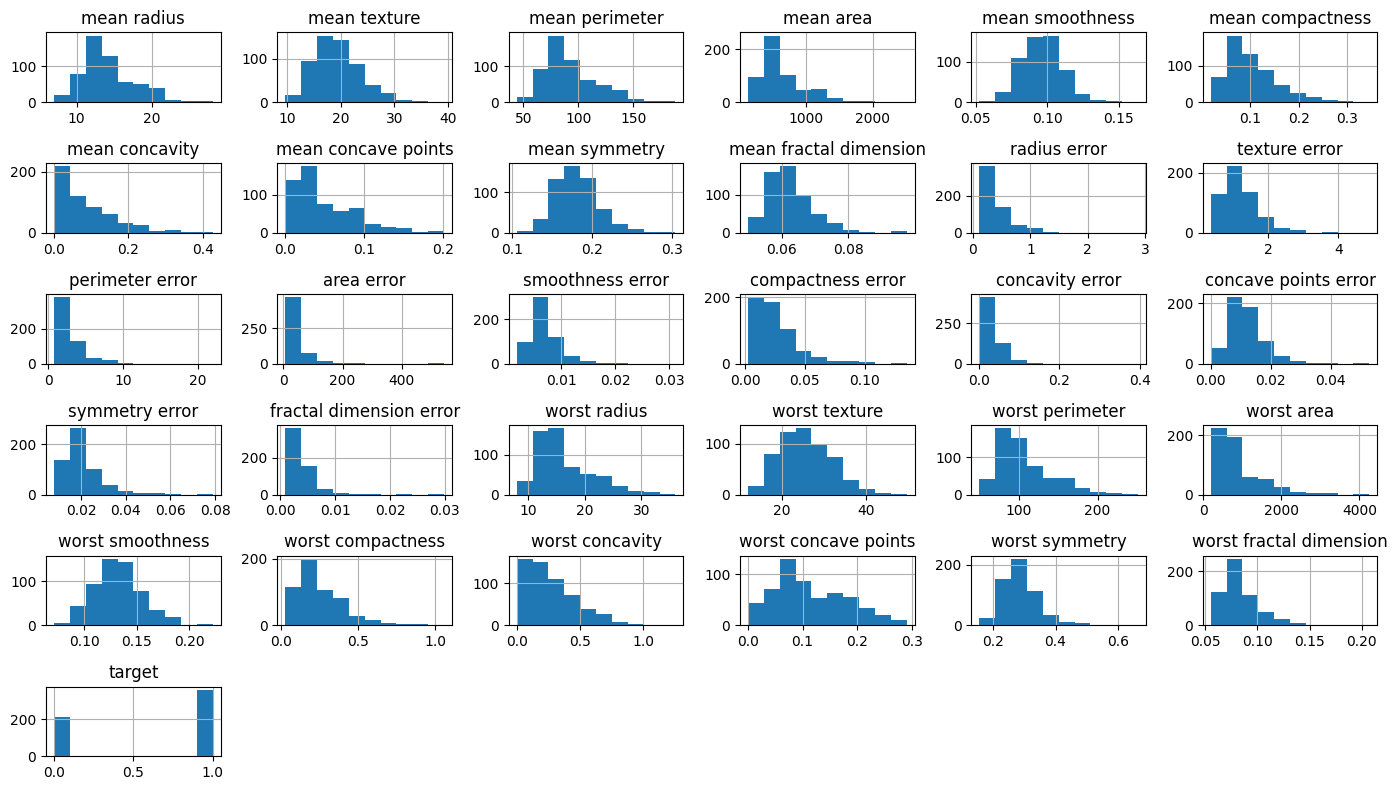

In [ ]:
import matplotlib.pyplot as plt

#individual features and their distribution
df.hist(figsize=(14, 8))
plt.tight_layout()

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
from sklearn.datasets import make_blobs # creates clusters of datapoint
# it generates randomly data acc to certain distributions

In [ ]:
X,y = make_blobs(n_samples=5000, centers=5)

In [ ]:
X

array([[-2.28642131, 10.48521735],
       [ 8.95218829,  1.69599698],
       [-2.49433085,  8.96630723],
       ...,
       [ 8.98441448,  2.57893715],
       [ 9.12139936,  1.20651858],
       [ 0.30920339,  8.60013774]])

In [ ]:
y

array([4, 1, 4, ..., 1, 2, 0])

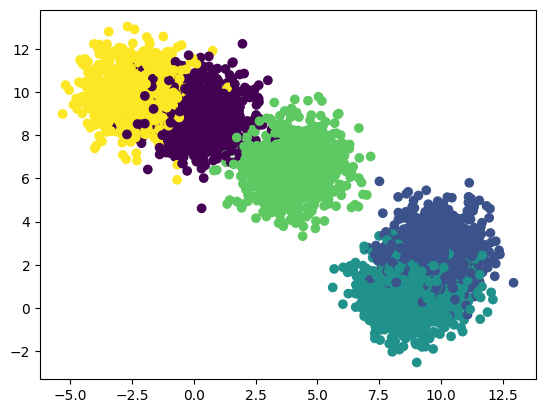

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y)

## SPLITTING THE DATA

In [ ]:
from sklearn.datasets import load_iris # flower classification
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()

X,y = data.data, data.target

#### Overfitting => you memorize the dataset, dont learn to recognize its feature
to avoid it
we learn on a portion of data and evaluate on an unseen portion of data

#### Validation set => useful when you want to tune hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 20% testing, 80% trraining

In [ ]:
len(X_train) #splititng is random , so it not very optimal

120

In [ ]:
len(X_test)

30

([<matplotlib.axis.XTick at 0x7bb0337ba090>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

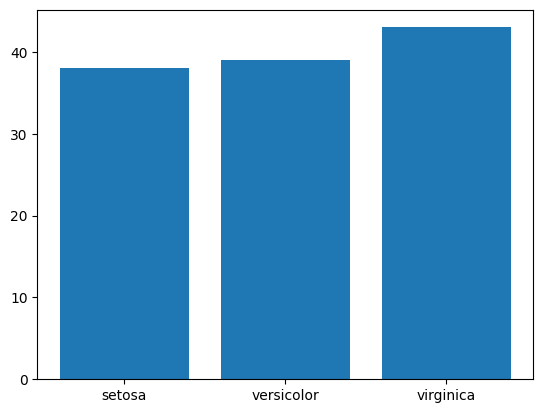

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# to see the distribution of the classification of the labels

counts = np.bincount(y_train)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

([<matplotlib.axis.XTick at 0x7bb033815610>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

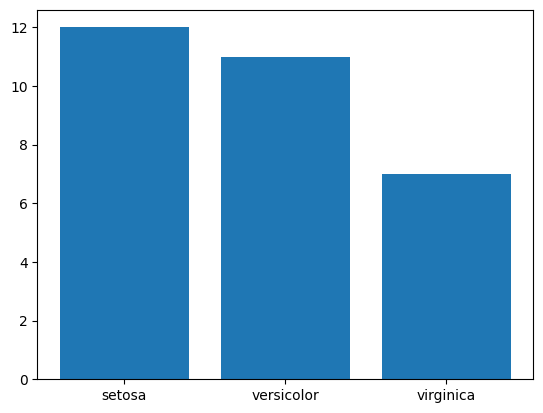

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# to see the distribution of the classification of the labels

counts = np.bincount(y_test)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

### we can see that the data is split equally making it a scwed datase so we will use stratified shuffle split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size=0.2)

for train_idx, test_idx in split.split(X, y):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

([<matplotlib.axis.XTick at 0x7bb0337b4380>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

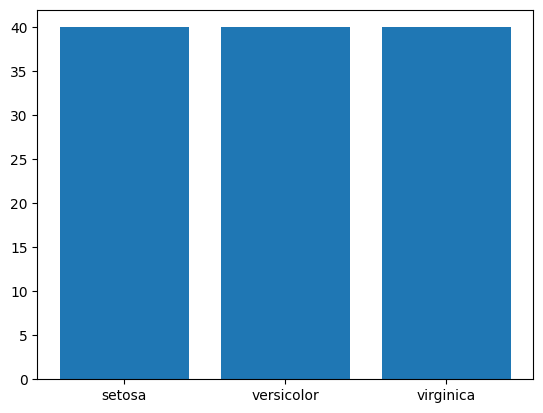

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# to see the distribution of the classification of the labels

counts = np.bincount(y_train)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

([<matplotlib.axis.XTick at 0x7bb03437d880>,
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

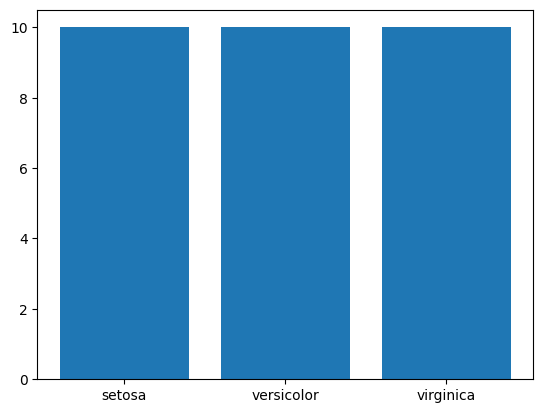

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# to see the distribution of the classification of the labels

counts = np.bincount(y_test)
positions = np.arange(3)

plt.bar(positions, counts)
plt.xticks(positions, data.target_names)

### now we can see that we have a perfectly split dataset

## PREPROCESSING

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # scales the data to a specific format


In [ ]:
X,y = load_iris(return_X_y=True)

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# ALL THE DATA HAS DIFF SCALE , AND IF WE USE AN CLASSIFIER LIKE knn , SO LARGER DATA WILL HAVE MORE SIGNIFICANCE THAN THE SMALLER ONE , SO WE NEED TO SCALE IT

In [ ]:
scaler = StandardScaler()    # creating an instance of standard scaller

# the reason we call fit transform is because the scaller has to learn certain values
# it takes a sample, takes mean, standard deviation etc from sample and does ome calculations based on values it learn from trining data
# the reason we call fir transosofom on training data b/c we learn these values and doing calculations

X_train_scaled = scaler.fit_transform(X_train)    # learning from the values
X_test_scaled = scaler.transform(X_test)    # we dont fit asgain, we use the same learned parameters

In [ ]:
X_train_scaled

array([[-1.20151232,  0.82583442, -0.99955901, -1.25366446],
       [ 0.59178965,  0.82583442,  1.07526194,  1.59214309],
       [ 1.07000351,  0.59801803,  1.13133818,  1.20407842],
       [ 0.59178965, -0.54106393,  0.79488073,  0.42794909],
       [ 1.30911044,  0.37020164,  1.13133818,  1.4627882 ],
       [ 0.47223619, -0.31324754,  0.34627079,  0.16923931],
       [-0.84285193,  1.50928359, -1.22386398, -0.99495468],
       [-0.36463807, -1.45232949,  0.06588958, -0.08947046],
       [ 0.71134312, -0.54106393,  1.07526194,  1.33343331],
       [ 1.30911044,  0.14238524,  0.68272824,  0.42794909],
       [-1.20151232,  0.82583442, -1.16778774, -1.25366446],
       [ 0.71134312, -0.54106393,  1.07526194,  1.20407842],
       [-0.84285193,  1.05365081, -1.27994022, -1.25366446],
       [ 0.71134312, -0.76888032,  0.90703321,  0.94536864],
       [-1.08195886,  0.14238524, -1.22386398, -1.38301935],
       [-0.84285193,  0.59801803, -1.1117115 , -0.8655998 ],
       [ 0.47223619, -0.

#### what standard scaler does?
it subtracts the mean from the data ands divide by standrd deviation, by doing this we zero center the data and we bring it to unit varience

In [ ]:
import numpy as np

(X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

array([[-1.20151232,  0.82583442, -0.99955901, -1.25366446],
       [ 0.59178965,  0.82583442,  1.07526194,  1.59214309],
       [ 1.07000351,  0.59801803,  1.13133818,  1.20407842],
       [ 0.59178965, -0.54106393,  0.79488073,  0.42794909],
       [ 1.30911044,  0.37020164,  1.13133818,  1.4627882 ],
       [ 0.47223619, -0.31324754,  0.34627079,  0.16923931],
       [-0.84285193,  1.50928359, -1.22386398, -0.99495468],
       [-0.36463807, -1.45232949,  0.06588958, -0.08947046],
       [ 0.71134312, -0.54106393,  1.07526194,  1.33343331],
       [ 1.30911044,  0.14238524,  0.68272824,  0.42794909],
       [-1.20151232,  0.82583442, -1.16778774, -1.25366446],
       [ 0.71134312, -0.54106393,  1.07526194,  1.20407842],
       [-0.84285193,  1.05365081, -1.27994022, -1.25366446],
       [ 0.71134312, -0.76888032,  0.90703321,  0.94536864],
       [-1.08195886,  0.14238524, -1.22386398, -1.38301935],
       [-0.84285193,  0.59801803, -1.1117115 , -0.8655998 ],
       [ 0.47223619, -0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)    # learning from the values
X_test_scaled = scaler.transform(X_test)    # we dont fit asgain, we use the same learned parameters

In [ ]:
X_train_scaled

array([[0.11428571, 0.58333333, 0.15254237, 0.04166667],
       [0.54285714, 0.58333333, 0.77966102, 0.95833333],
       [0.65714286, 0.54166667, 0.79661017, 0.83333333],
       [0.54285714, 0.33333333, 0.69491525, 0.58333333],
       [0.71428571, 0.5       , 0.79661017, 0.91666667],
       [0.51428571, 0.375     , 0.55932203, 0.5       ],
       [0.2       , 0.70833333, 0.08474576, 0.125     ],
       [0.31428571, 0.16666667, 0.47457627, 0.41666667],
       [0.57142857, 0.33333333, 0.77966102, 0.875     ],
       [0.71428571, 0.45833333, 0.66101695, 0.58333333],
       [0.11428571, 0.58333333, 0.10169492, 0.04166667],
       [0.57142857, 0.33333333, 0.77966102, 0.83333333],
       [0.2       , 0.625     , 0.06779661, 0.04166667],
       [0.57142857, 0.29166667, 0.72881356, 0.75      ],
       [0.14285714, 0.45833333, 0.08474576, 0.        ],
       [0.2       , 0.54166667, 0.11864407, 0.16666667],
       [0.51428571, 0.33333333, 0.6440678 , 0.70833333],
       [0.94285714, 0.41666667,

In [ ]:
X_min = np.min(X_train, axis=0)
X_man = np.max(X_train, axis=0)

(X_train - X_min) / (X_man - X_min)

array([[0.11428571, 0.58333333, 0.15254237, 0.04166667],
       [0.54285714, 0.58333333, 0.77966102, 0.95833333],
       [0.65714286, 0.54166667, 0.79661017, 0.83333333],
       [0.54285714, 0.33333333, 0.69491525, 0.58333333],
       [0.71428571, 0.5       , 0.79661017, 0.91666667],
       [0.51428571, 0.375     , 0.55932203, 0.5       ],
       [0.2       , 0.70833333, 0.08474576, 0.125     ],
       [0.31428571, 0.16666667, 0.47457627, 0.41666667],
       [0.57142857, 0.33333333, 0.77966102, 0.875     ],
       [0.71428571, 0.45833333, 0.66101695, 0.58333333],
       [0.11428571, 0.58333333, 0.10169492, 0.04166667],
       [0.57142857, 0.33333333, 0.77966102, 0.83333333],
       [0.2       , 0.625     , 0.06779661, 0.04166667],
       [0.57142857, 0.29166667, 0.72881356, 0.75      ],
       [0.14285714, 0.45833333, 0.08474576, 0.        ],
       [0.2       , 0.54166667, 0.11864407, 0.16666667],
       [0.51428571, 0.33333333, 0.6440678 , 0.70833333],
       [0.94285714, 0.41666667,

## FEATURE ENCODING

In [ ]:
# some datasets have features that are not numerical
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = fetch_openml('car', as_frame=True).frame

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


In [ ]:
data

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,N
1724,low,low,5more,more,med,high,N
1725,low,low,5more,more,big,low,P
1726,low,low,5more,more,big,med,N


we cannot feed such data as most machine learning algo work wsith numbers,be it neural network, naive byers classifieror basian

we need to take some of numerical data and turn them into numerical features

In [ ]:
columns_to_encode = ['lug_boot', 'safety']

encoder = OrdinalEncoder(
    categories = [
        ['small', 'med', 'big'],
        ['low', 'med', 'high']
    ]
)

data[columns_to_encode] = encoder.fit_transform(data[columns_to_encode])

In [ ]:
data

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,0.0,0.0,P
1,vhigh,vhigh,2,2,0.0,1.0,P
2,vhigh,vhigh,2,2,0.0,2.0,P
3,vhigh,vhigh,2,2,1.0,0.0,P
4,vhigh,vhigh,2,2,1.0,1.0,P
...,...,...,...,...,...,...,...
1723,low,low,5more,more,1.0,1.0,N
1724,low,low,5more,more,1.0,2.0,N
1725,low,low,5more,more,2.0,0.0,P
1726,low,low,5more,more,2.0,1.0,N


In [ ]:
# we can inverse it
encoder.inverse_transform(data[columns_to_encode])

array([['small', 'low'],
       ['small', 'med'],
       ['small', 'high'],
       ...,
       ['big', 'low'],
       ['big', 'med'],
       ['big', 'high']], dtype=object)

In [ ]:
data = fetch_openml('adult', as_frame=True).frame

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=179
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=1590

  warn(warning_msg)


In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


OrdinalEncosde=> when there is progression

Onehotencoder=> when there is no progression or relation, something like a decision tree , where we have to say yes/no

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data.occupation.value_counts() #list of values and how often they occur

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #if any unkown valueoccur during testing , that did not occur during training will be ignored

encoded_values = encoder.fit_transform(data[['occupation', 'race']])
new_cols = encoder.get_feature_names_out(['occupation', 'race']) # we will get values but also need  col values or names

In [ ]:
encoded_values

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
new_cols

array(['occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_nan', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White'], dtype=object)

In [ ]:
# now how do we actually take and merge these values
df_encoded = pd.DataFrame(encoded_values, columns= new_cols, index=data.index)

data_final = pd.concat(
    [data.drop(columns=['occupation', 'race']), df_encoded],
    axis=1
)

In [ ]:
data_final

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,sex,capitalgain,capitalloss,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,2,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Not-in-family,Female,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48838,4,NaN,321403,HS-grad,9,Widowed,Other-relative,Male,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48840,2,Private,83891,Bachelors,13,Divorced,Own-child,Male,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## CLASSIFICATION

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test , y_train,y_test = train_test_split(X,y, test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier #import the classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clf = KNeighborsClassifier() #create instance

clf.fit(X_train_scaled, y_train) #train the model on training data
# the model is now trained

KNeighborsClassifier()

In [4]:
# nows we will evaluate the model, how the model performs on the unseen data
clf.score(X_test_scaled, y_test)

0.9824561403508771

In [10]:
# now i can use this classifier to make individual instances
single_instance = X_test_scaled[6]

In [11]:
single_instance

array([-0.25492137,  0.59692168, -0.29735265, -0.32655735, -0.77030387,
       -0.78111833, -0.70522804, -0.65465165, -0.01299308, -0.81076116,
       -0.5139421 ,  0.71052266, -0.42041582, -0.421455  , -0.50881651,
       -0.29086647, -0.47743473, -0.89286334, -0.27208423, -0.68861888,
       -0.44418212,  0.66147655, -0.44344797, -0.47114972, -0.80370031,
       -0.57148901, -0.74786344, -0.90547124, -0.42926245, -0.96010256])

In [12]:
clf.predict([single_instance])

array([1])

In [13]:
y_test[6]

np.int64(1)

In [14]:
clf.predict_proba([single_instance])

array([[0., 1.]])

## REGRESSION

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification => you are predicting classes , yes or no or

Regression => is on a cotntinuous spectrum and you try to find the correct value , like price of the house

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
reg.score(X_test_scaled, y_test) # R^2 Score

0.6116994811899554

In [24]:
single_instance = X_test_scaled[0]

single_instance

array([-5.56428949e-01,  4.19048901e-01, -2.27405603e-01, -2.26044186e-01,
        1.01621095e-01,  5.23159325e-05, -7.06537894e-01,  1.17299758e+00])

In [25]:
reg.predict([single_instance])

array([1.26547493])

## CLUSTERING

unsupervised learining
data is unlabelled
you want to cluster the data

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# we dont need to do test train split as there is no true answer so we dont need to teach the model

In [3]:
X, _=make_blobs(n_samples=5000, centers=5, random_state=10)
X

array([[  6.17306585, -10.25446247],
       [ -8.13981972,   4.45135687],
       [  2.71307241,   4.32686739],
       ...,
       [ -6.91896111,   4.29323728],
       [ -3.95595105,   4.23150467],
       [  0.91461712,  -7.45569288]])

In [4]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

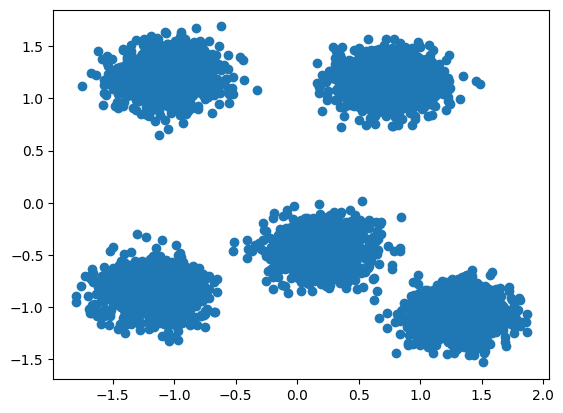

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:,0], X_scaled[:,1])

In [8]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X_scaled)

KMeans(n_clusters=5)

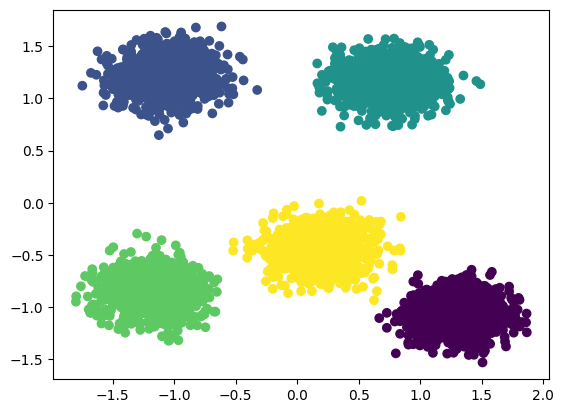

In [10]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=kmeans.labels_)

In [13]:
from sklearn.datasets import make_moons

X, _=make_moons(n_samples=5000, noise=0.08)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

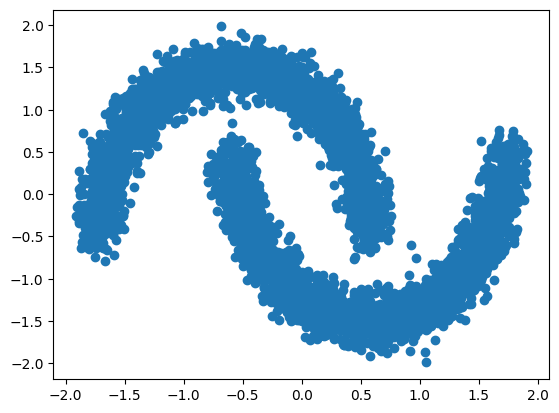

In [14]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])

In [15]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_scaled)

KMeans(n_clusters=2)

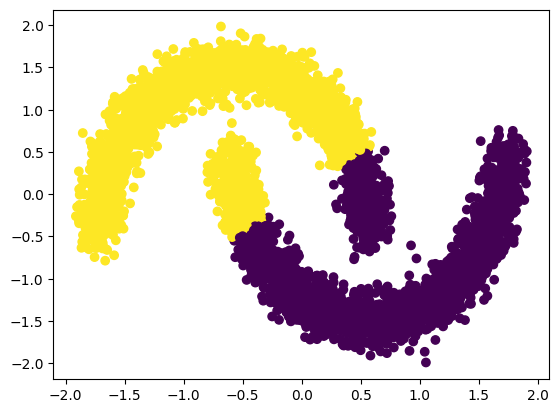

In [17]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_)